In [44]:
import pandas as pd
import numpy as np
import time
from datetime import datetime

In [45]:
df = pd.read_csv("/Users/arnet/Desktop/Ironhack/GitHub/ironhack_lab_assignments/Day3/lab-customer-analysis-round-2-master/files_for_lab/csv_files/marketing_customer_analysis.csv")

# Shape

In [46]:
df.shape

(10910, 26)

# Standardize header names

In [47]:
df.tail()

Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
10905       10905  FE99816      Nevada             15563.369440       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10907       10907  TL39050     Arizona             23893.304100       No   
10908       10908  WA60547  California             11971.977650       No   
10909       10909  IV32877         NaN              6857.519928      NaN   

       Coverage Education Effective To Date EmploymentStatus Gender  ...  \
10905   Premium  Bachelor           1/19/11       Unemployed      F  ...   
10906     Basic   College            1/6/11         Employed      F  ...   
10907  Extended  Bachelor            2/6/11         Employed      F  ...   
10908   Premium   College           2/13/11         Employed      F  ...   
10909     Basic  Bachelor            1/8/11       Unemployed      M  ...   

       Number of Open Complaints Number of Policies     Policy Type  \
10905                        NaN                  7   Personal Auto   
10906                        0.0                  6   Personal Auto   
10907                        0.0                  2  Corporate Auto   
10908                        4.0                  6   Personal Auto   
10909                        0.0                  3   Personal Auto   

             Policy  Renew Offer Type  Sales Channel  Total Claim Amount  \
10905   Personal L1            Offer3            Web         1214.400000   
10906   Personal L3            Offer2         Branch          273.018929   
10907  Corporate L3            Offer1            Web          381.306996   
10908   Personal L1            Offer1         Branch          618.288849   
10909   Personal L1            Offer4            Web         1021.719397   

       Vehicle Class Vehicle Size Vehicle Type  
10905     Luxury Car      Medsize            A  
10906  Four-Door Car      Medsize            A  
10907     Luxury SUV      Medsize          NaN  
10908            SUV      Medsize            A  
10909            SUV      Medsize          NaN  

[5 rows x 26 columns]

In [48]:
# Drop index column and vehicle type column
df = df.drop(['Unnamed: 0', 'Vehicle Type'], axis=1)
df

Customer       State  Customer Lifetime Value Response  Coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877         NaN              6857.519928      NaN     Basic   

      Education Effective To Date EmploymentStatus Gender  Income  ...  \
0       College           2/18/11         Employed      M   48029  ...   
1       College           1/18/11       Unemployed      F       0  ...   
2      Bachelor           2/10/11         Employed      M   22139  ...   
3       College           1/11/11         Employed      M   49078  ...   
4      Bachelor           1/17/11    Medical Leave      F   23675  ...   
...         ...               ...              ...    ...     ...  ...   
10905  Bachelor           1/19/11       Unemployed      F       0  ...   
10906   College            1/6/11         Employed      F   61146  ...   
10907  Bachelor            2/6/11         Employed      F   39837  ...   
10908   College           2/13/11         Employed      F   64195  ...   
10909  Bachelor            1/8/11       Unemployed      M       0  ...   

      Months Since Policy Inception Number of Open Complaints  \
0                                52                       0.0   
1                                26                       0.0   
2                                31                       0.0   
3                                 3                       0.0   
4                                31                       NaN   
...                             ...                       ...   
10905                            40                       NaN   
10906                            68                       0.0   
10907                            63                       0.0   
10908                            27                       4.0   
10909                             1                       0.0   

       Number of Policies     Policy Type        Policy  Renew Offer Type  \
0                       9  Corporate Auto  Corporate L3            Offer3   
1                       1   Personal Auto   Personal L3            Offer4   
2                       2   Personal Auto   Personal L3            Offer3   
3                       2  Corporate Auto  Corporate L3            Offer2   
4                       7   Personal Auto   Personal L2            Offer1   
...                   ...             ...           ...               ...   
10905                   7   Personal Auto   Personal L1            Offer3   
10906                   6   Personal Auto   Personal L3            Offer2   
10907                   2  Corporate Auto  Corporate L3            Offer1   
10908                   6   Personal Auto   Personal L1            Offer1   
10909                   3   Personal Auto   Personal L1            Offer4   

       Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
0              Agent         292.800000  Four-Door Car      Medsize  
1        Call Center         744.924331  Four-Door Car      Medsize  
2        Call Center         480.000000            SUV      Medsize  
3             Branch         484.013411  Four-Door Car      Medsize  
4             Branch         707.925645  Four-Door Car      Medsize  
...              ...                ...            ...          ...  
10905            Web        1214

In [49]:
df.columns.to_list()

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [50]:
# Rename columns to ensure consistency
df = df.rename(columns={'EmploymentStatus': 'Employment Status'})
df.columns.to_list()

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'Employment Status',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [51]:
def standardise_col(col):
    return col.lower().replace(" ", "_")

standard_heads =[]
for column in df.columns:
    standard_heads.append(standardise_col(column))

df.columns = standard_heads
df.head()

customer       state  customer_lifetime_value response  coverage education  \
0  DK49336     Arizona              4809.216960       No     Basic   College   
1  KX64629  California              2228.525238       No     Basic   College   
2  LZ68649  Washington             14947.917300       No     Basic  Bachelor   
3  XL78013      Oregon             22332.439460      Yes  Extended   College   
4  QA50777      Oregon              9025.067525       No   Premium  Bachelor   

  effective_to_date employment_status gender  income  ...  \
0           2/18/11          Employed      M   48029  ...   
1           1/18/11        Unemployed      F       0  ...   
2           2/10/11          Employed      M   22139  ...   
3           1/11/11          Employed      M   49078  ...   
4           1/17/11     Medical Leave      F   23675  ...   

  months_since_policy_inception number_of_open_complaints  number_of_policies  \
0                            52                       0.0                   9   
1                            26                       0.0                   1   
2                            31                       0.0                   2   
3                             3                       0.0                   2   
4                            31                       NaN                   7   

      policy_type        policy  renew_offer_type  sales_channel  \
0  Corporate Auto  Corporate L3            Offer3          Agent   
1   Personal Auto   Personal L3            Offer4    Call Center   
2   Personal Auto   Personal L3            Offer3    Call Center   
3  Corporate Auto  Corporate L3            Offer2         Branch   
4   Personal Auto   Personal L2            Offer1         Branch   

  total_claim_amount  vehicle_class vehicle_size  
0         292.800000  Four-Door Car      Medsize  
1         744.924331  Four-Door Car      Medsize  
2         480.000000            SUV      Medsize  
3         484.013411  Four-Door Car      Medsize  
4         707.925645  Four-Door Car      Medsize  

[5 rows x 24 columns]

# Categorical and Numerical

In [52]:
df_numerical = df.select_dtypes(np.number)
df_numerical

customer_lifetime_value  income  monthly_premium_auto  \
0                  4809.216960   48029                    61   
1                  2228.525238       0                    64   
2                 14947.917300   22139                   100   
3                 22332.439460   49078                    97   
4                  9025.067525   23675                   117   
...                        ...     ...                   ...   
10905             15563.369440       0                   253   
10906              5259.444853   61146                    65   
10907             23893.304100   39837                   201   
10908             11971.977650   64195                   158   
10909              6857.519928       0                   101   

       months_since_last_claim  months_since_policy_inception  \
0                          7.0                             52   
1                          3.0                             26   
2                         34.0                             31   
3                         10.0                              3   
4                          NaN                             31   
...                        ...                            ...   
10905                      NaN                             40   
10906                      7.0                             68   
10907                     11.0                             63   
10908                      0.0                             27   
10909                     31.0                              1   

       number_of_open_complaints  number_of_policies  total_claim_amount  
0                            0.0                   9          292.800000  
1                            0.0                   1          744.924331  
2                            0.0                   2          480.000000  
3                            0.0                   2          484.013411  
4                            NaN                   7          707.925645  
...                          ...                 ...                 ...  
10905                        NaN                   7         1214.400000  
10906                        0.0                   6          273.018929  
10907                        0.0                   2          381.306996  
10908                        4.0                   6          618.288849  
10909                        0.0                   3         1021.719397  

[10910 rows x 8 columns]

In [53]:
#Reset index
df.reset_index(drop=True, inplace=True)
df.shape

(10910, 24)

In [12]:
df_categorical = df.drop(columns = df_numerical.columns)
df_categorical
df_categorical = df.select_dtypes(include='object')
df_categorical.columns.to_list()

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10279 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10279 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employment_status              10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

# Null values

In [14]:
nulls_df= pd.DataFrame(round(df.isna().sum()/len(df), 4)*100)
nulls_df

0
customer                       0.00
state                          5.78
customer_lifetime_value        0.00
response                       5.78
coverage                       0.00
education                      0.00
effective_to_date              0.00
employment_status              0.00
gender                         0.00
income                         0.00
location_code                  0.00
marital_status                 0.00
monthly_premium_auto           0.00
months_since_last_claim        5.80
months_since_policy_inception  0.00
number_of_open_complaints      5.80
number_of_policies             0.00
policy_type                    0.00
policy                         0.00
renew_offer_type               0.00
sales_channel                  0.00
total_claim_amount             0.00
vehicle_class                  5.70
vehicle_size                   5.70

In [15]:
# Replace all Null Values in categorical columns with 'Unknown'
for column in df_categorical.columns:
    df[column]= df[column].fillna('Unknown')
df

customer       state  customer_lifetime_value response  coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877     Unknown              6857.519928  Unknown     Basic   

      education effective_to_date employment_status gender  income  ...  \
0       College           2/18/11          Employed      M   48029  ...   
1       College           1/18/11        Unemployed      F       0  ...   
2      Bachelor           2/10/11          Employed      M   22139  ...   
3       College           1/11/11          Employed      M   49078  ...   
4      Bachelor           1/17/11     Medical Leave      F   23675  ...   
...         ...               ...               ...    ...     ...  ...   
10905  Bachelor           1/19/11        Unemployed      F       0  ...   
10906   College            1/6/11          Employed      F   61146  ...   
10907  Bachelor            2/6/11          Employed      F   39837  ...   
10908   College           2/13/11          Employed      F   64195  ...   
10909  Bachelor            1/8/11        Unemployed      M       0  ...   

      months_since_policy_inception number_of_open_complaints  \
0                                52                       0.0   
1                                26                       0.0   
2                                31                       0.0   
3                                 3                       0.0   
4                                31                       NaN   
...                             ...                       ...   
10905                            40                       NaN   
10906                            68                       0.0   
10907                            63                       0.0   
10908                            27                       4.0   
10909                             1                       0.0   

       number_of_policies     policy_type        policy  renew_offer_type  \
0                       9  Corporate Auto  Corporate L3            Offer3   
1                       1   Personal Auto   Personal L3            Offer4   
2                       2   Personal Auto   Personal L3            Offer3   
3                       2  Corporate Auto  Corporate L3            Offer2   
4                       7   Personal Auto   Personal L2            Offer1   
...                   ...             ...           ...               ...   
10905                   7   Personal Auto   Personal L1            Offer3   
10906                   6   Personal Auto   Personal L3            Offer2   
10907                   2  Corporate Auto  Corporate L3            Offer1   
10908                   6   Personal Auto   Personal L1            Offer1   
10909                   3   Personal Auto   Personal L1            Offer4   

       sales_channel total_claim_amount  vehicle_class vehicle_size  
0              Agent         292.800000  Four-Door Car      Medsize  
1        Call Center         744.924331  Four-Door Car      Medsize  
2        Call Center         480.000000            SUV      Medsize  
3             Branch         484.013411  Four-Door Car      Medsize  
4             Branch         707.925645  Four-Door Car      Medsize  
...              ...                ...            ...          ...  
10905            Web

In [16]:
# Replace all Null Values in numerical columns with mean
for column in df_numerical.columns:
    df[column]= df[column].fillna(df[column].mean())
df

customer       state  customer_lifetime_value response  coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877     Unknown              6857.519928  Unknown     Basic   

      education effective_to_date employment_status gender  income  ...  \
0       College           2/18/11          Employed      M   48029  ...   
1       College           1/18/11        Unemployed      F       0  ...   
2      Bachelor           2/10/11          Employed      M   22139  ...   
3       College           1/11/11          Employed      M   49078  ...   
4      Bachelor           1/17/11     Medical Leave      F   23675  ...   
...         ...               ...               ...    ...     ...  ...   
10905  Bachelor           1/19/11        Unemployed      F       0  ...   
10906   College            1/6/11          Employed      F   61146  ...   
10907  Bachelor            2/6/11          Employed      F   39837  ...   
10908   College           2/13/11          Employed      F   64195  ...   
10909  Bachelor            1/8/11        Unemployed      M       0  ...   

      months_since_policy_inception number_of_open_complaints  \
0                                52                  0.000000   
1                                26                  0.000000   
2                                31                  0.000000   
3                                 3                  0.000000   
4                                31                  0.384256   
...                             ...                       ...   
10905                            40                  0.384256   
10906                            68                  0.000000   
10907                            63                  0.000000   
10908                            27                  4.000000   
10909                             1                  0.000000   

       number_of_policies     policy_type        policy  renew_offer_type  \
0                       9  Corporate Auto  Corporate L3            Offer3   
1                       1   Personal Auto   Personal L3            Offer4   
2                       2   Personal Auto   Personal L3            Offer3   
3                       2  Corporate Auto  Corporate L3            Offer2   
4                       7   Personal Auto   Personal L2            Offer1   
...                   ...             ...           ...               ...   
10905                   7   Personal Auto   Personal L1            Offer3   
10906                   6   Personal Auto   Personal L3            Offer2   
10907                   2  Corporate Auto  Corporate L3            Offer1   
10908                   6   Personal Auto   Personal L1            Offer1   
10909                   3   Personal Auto   Personal L1            Offer4   

       sales_channel total_claim_amount  vehicle_class vehicle_size  
0              Agent         292.800000  Four-Door Car      Medsize  
1        Call Center         744.924331  Four-Door Car      Medsize  
2        Call Center         480.000000            SUV      Medsize  
3             Branch         484.013411  Four-Door Car      Medsize  
4             Branch         707.925645  Four-Door Car      Medsize  
...              ...                ...            ...          ...  
10905            Web

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employment_status              10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

# Datetime Format

In [18]:
# Change date to date/time format
df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer_lifetime_value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective_to_date              10910 non-null  datetime64[ns]
 7   employment_status              10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location_code                  10910 non-null  object        
 11  marital_status 

In [19]:
df.head()

customer       state  customer_lifetime_value response  coverage education  \
0  DK49336     Arizona              4809.216960       No     Basic   College   
1  KX64629  California              2228.525238       No     Basic   College   
2  LZ68649  Washington             14947.917300       No     Basic  Bachelor   
3  XL78013      Oregon             22332.439460      Yes  Extended   College   
4  QA50777      Oregon              9025.067525       No   Premium  Bachelor   

  effective_to_date employment_status gender  income  ...  \
0        2011-02-18          Employed      M   48029  ...   
1        2011-01-18        Unemployed      F       0  ...   
2        2011-02-10          Employed      M   22139  ...   
3        2011-01-11          Employed      M   49078  ...   
4        2011-01-17     Medical Leave      F   23675  ...   

  months_since_policy_inception number_of_open_complaints  number_of_policies  \
0                            52                  0.000000                   9   
1                            26                  0.000000                   1   
2                            31                  0.000000                   2   
3                             3                  0.000000                   2   
4                            31                  0.384256                   7   

      policy_type        policy  renew_offer_type  sales_channel  \
0  Corporate Auto  Corporate L3            Offer3          Agent   
1   Personal Auto   Personal L3            Offer4    Call Center   
2   Personal Auto   Personal L3            Offer3    Call Center   
3  Corporate Auto  Corporate L3            Offer2         Branch   
4   Personal Auto   Personal L2            Offer1         Branch   

  total_claim_amount  vehicle_class vehicle_size  
0         292.800000  Four-Door Car      Medsize  
1         744.924331  Four-Door Car      Medsize  
2         480.000000            SUV      Medsize  
3         484.013411  Four-Door Car      Medsize  
4         707.925645  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [20]:
# Extract month and save in a different column
df['month']= pd.DatetimeIndex(df['effective_to_date']).month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer_lifetime_value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective_to_date              10910 non-null  datetime64[ns]
 7   employment_status              10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location_code                  10910 non-null  object        
 11  marital_status 

In [21]:
df.shape

(10910, 25)

In [22]:
print(nulls_df)

                                  0
customer                       0.00
state                          5.78
customer_lifetime_value        0.00
response                       5.78
coverage                       0.00
education                      0.00
effective_to_date              0.00
employment_status              0.00
gender                         0.00
income                         0.00
location_code                  0.00
marital_status                 0.00
monthly_premium_auto           0.00
months_since_last_claim        5.80
months_since_policy_inception  0.00
number_of_open_complaints      5.80
number_of_policies             0.00
policy_type                    0.00
policy                         0.00
renew_offer_type               0.00
sales_channel                  0.00
total_claim_amount             0.00
vehicle_class                  5.70
vehicle_size                   5.70


# Set Filter

In [23]:
df = df.query('month<3')
df

customer       state  customer_lifetime_value response  coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877     Unknown              6857.519928  Unknown     Basic   

      education effective_to_date employment_status gender  income  ...  \
0       College        2011-02-18          Employed      M   48029  ...   
1       College        2011-01-18        Unemployed      F       0  ...   
2      Bachelor        2011-02-10          Employed      M   22139  ...   
3       College        2011-01-11          Employed      M   49078  ...   
4      Bachelor        2011-01-17     Medical Leave      F   23675  ...   
...         ...               ...               ...    ...     ...  ...   
10905  Bachelor        2011-01-19        Unemployed      F       0  ...   
10906   College        2011-01-06          Employed      F   61146  ...   
10907  Bachelor        2011-02-06          Employed      F   39837  ...   
10908   College        2011-02-13          Employed      F   64195  ...   
10909  Bachelor        2011-01-08        Unemployed      M       0  ...   

      number_of_open_complaints number_of_policies     policy_type  \
0                      0.000000                  9  Corporate Auto   
1                      0.000000                  1   Personal Auto   
2                      0.000000                  2   Personal Auto   
3                      0.000000                  2  Corporate Auto   
4                      0.384256                  7   Personal Auto   
...                         ...                ...             ...   
10905                  0.384256                  7   Personal Auto   
10906                  0.000000                  6   Personal Auto   
10907                  0.000000                  2  Corporate Auto   
10908                  4.000000                  6   Personal Auto   
10909                  0.000000                  3   Personal Auto   

             policy  renew_offer_type  sales_channel  total_claim_amount  \
0      Corporate L3            Offer3          Agent          292.800000   
1       Personal L3            Offer4    Call Center          744.924331   
2       Personal L3            Offer3    Call Center          480.000000   
3      Corporate L3            Offer2         Branch          484.013411   
4       Personal L2            Offer1         Branch          707.925645   
...             ...               ...            ...                 ...   
10905   Personal L1            Offer3            Web         1214.400000   
10906   Personal L3            Offer2         Branch          273.018929   
10907  Corporate L3            Offer1            Web          381.306996   
10908   Personal L1            Offer1         Branch          618.288849   
10909   Personal L1            Offer4            Web         1021.719397   

       vehicle_class vehicle_size month  
0      Four-Door Car      Medsize     2  
1      Four-Door Car      Medsize     1  
2                SUV      Medsize     2  
3      Four-Door Car      Medsize     1  
4      Four-Door Car      Medsize     1  
...              ...          ...   ...  
10905     Luxury Car      Medsize     1  
10906  Four-Door Car      Medsize     1  
10907     Luxury SUV      Medsize     2  
10908            SUV      Medsize     2  


# Bonus

In [61]:
def standardise_col(col):
    return col.lower().replace(" ", "_")

def clean_data(df):
    #Drop columns
    df = df.drop(['Unnamed: 0', 'Vehicle Type'], axis=1)
    df.reset_index(drop=True, inplace=True)
    
    #Rename columns
    df = df.rename(columns={'EmploymentStatus': 'Employment Status'})
    
    # Standardise column names
    standard_heads =[]
    for column in df.columns:
        standard_heads.append(column.lower().replace(" ", "_"))
    df.columns = standard_heads
    
    #Create nulls dataframe
    nulls_df= pd.DataFrame(round(df.isna().sum()/len(df), 4)*100)
    
    print("Overview of Null Values before clean: ")
    print(nulls_df)
    
    # Identify categorical and numerical columns
    df_numerical = df.select_dtypes(np.number)
    df.reset_index(drop=True, inplace=True)
    df_categorical = df.select_dtypes(include='object')
    df.reset_index(drop=True, inplace=True)
    
    # Replace all Null Values in categorical columns with 'Unknown'
    for column in df_categorical.columns:
        df[column]= df[column].fillna('Unknown')
    
    # Replace all Null Values in numerical columns with mean
    for column in df_numerical.columns:
        df[column]= df[column].fillna(df[column].mean())
    
    #Change date to date/time format
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df.reset_index(drop=True, inplace=True)
    
    # Extract month and save in a different column
    df['month']= pd.DatetimeIndex(df['effective_to_date']).month
    df.reset_index(drop=True, inplace=True)
    
    # Create filtered data out data that is not in the first quarter
    df = df.query('month<3 & income>0')
    df.reset_index(drop=True, inplace=True)
        
    return df

df = pd.read_csv("/Users/arnet/Desktop/Ironhack/GitHub/ironhack_lab_assignments/Day3/lab-customer-analysis-round-2-master/files_for_lab/csv_files/marketing_customer_analysis.csv")
df = clean_data(df)

Overview of Null Values before clean: 
                                  0
customer                       0.00
state                          5.78
customer_lifetime_value        0.00
response                       5.78
coverage                       0.00
education                      0.00
effective_to_date              0.00
employment_status              0.00
gender                         0.00
income                         0.00
location_code                  0.00
marital_status                 0.00
monthly_premium_auto           0.00
months_since_last_claim        5.80
months_since_policy_inception  0.00
number_of_open_complaints      5.80
number_of_policies             0.00
policy_type                    0.00
policy                         0.00
renew_offer_type               0.00
sales_channel                  0.00
total_claim_amount             0.00
vehicle_class                  5.70
vehicle_size                   5.70


# Exploratory Data Analysis

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       8123 non-null   object        
 1   state                          8123 non-null   object        
 2   customer_lifetime_value        8123 non-null   float64       
 3   response                       8123 non-null   object        
 4   coverage                       8123 non-null   object        
 5   education                      8123 non-null   object        
 6   effective_to_date              8123 non-null   datetime64[ns]
 7   employment_status              8123 non-null   object        
 8   gender                         8123 non-null   object        
 9   income                         8123 non-null   int64         
 10  location_code                  8123 non-null   object        
 11  marital_status   

In [26]:
df.describe()

customer_lifetime_value        income  monthly_premium_auto  \
count              8123.000000   8123.000000           8123.000000   
mean               8156.394064  50414.978087             92.996430   
std                6999.969560  24260.858125             34.644927   
min                2119.894333  10037.000000             61.000000   
25%                4110.908596  28422.000000             68.000000   
50%                5807.659307  48156.000000             83.000000   
75%                9075.768214  70060.000000            109.000000   
max               83325.381190  99981.000000            297.000000   

       months_since_last_claim  months_since_policy_inception  \
count              8123.000000                    8123.000000   
mean                 15.101086                      47.856334   
std                   9.788179                      27.902302   
min                   0.000000                       0.000000   
25%                   7.000000                      24.000000   
50%                  15.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       number_of_open_complaints  number_of_policies  total_claim_amount  \
count                8123.000000         8123.000000         8123.000000   
mean                    0.382815            2.962452          377.910109   
std                     0.881496            2.403456          251.933134   
min                     0.000000            1.000000            0.099007   
25%                     0.000000            1.000000          213.032940   
50%                     0.000000            2.000000          340.800000   
75%                     0.384256            4.000000          499.200000   
max                     5.000000            9.000000         2893.239678   

             month  
count  8123.000000  
mean      1.470023  
std       0.499131  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       2.000000  
max       2.000000

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

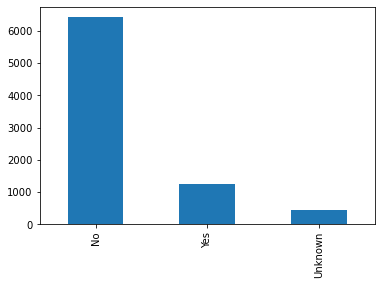

In [28]:
# Yes and No responses
df['response'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

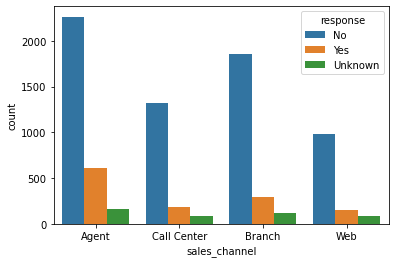

In [29]:
# Rate of yes and no responses according to sales channel
sns.countplot(data=df, x='sales_channel', hue='response')

<AxesSubplot:xlabel='total_claim_amount', ylabel='response'>

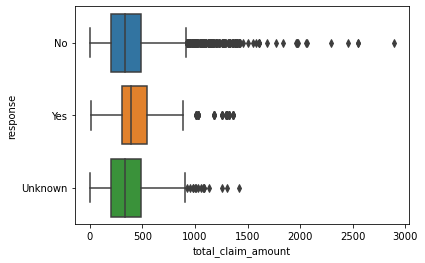

In [30]:
#Show a plot of the distribution of the Total Claim Amount, broken down by response type
sns.boxplot(x='total_claim_amount', y="response", data=df)

<AxesSubplot:>

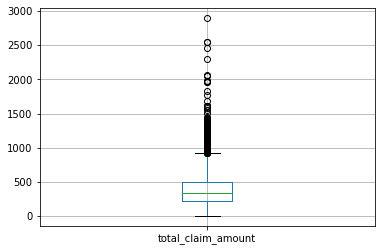

In [31]:
df.boxplot('total_claim_amount')

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

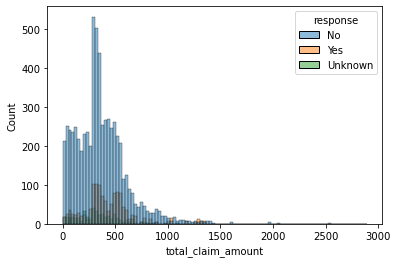

In [32]:
sns.histplot(x='total_claim_amount', hue="response", data=df)

<AxesSubplot:xlabel='income', ylabel='Count'>

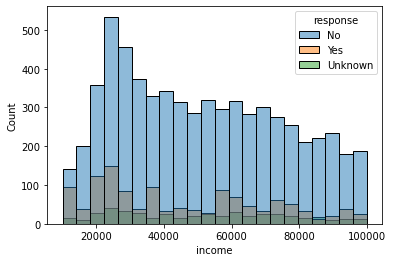

In [33]:
sns.histplot(x='income', hue="response", data=df)

<AxesSubplot:xlabel='income', ylabel='total_claim_amount'>

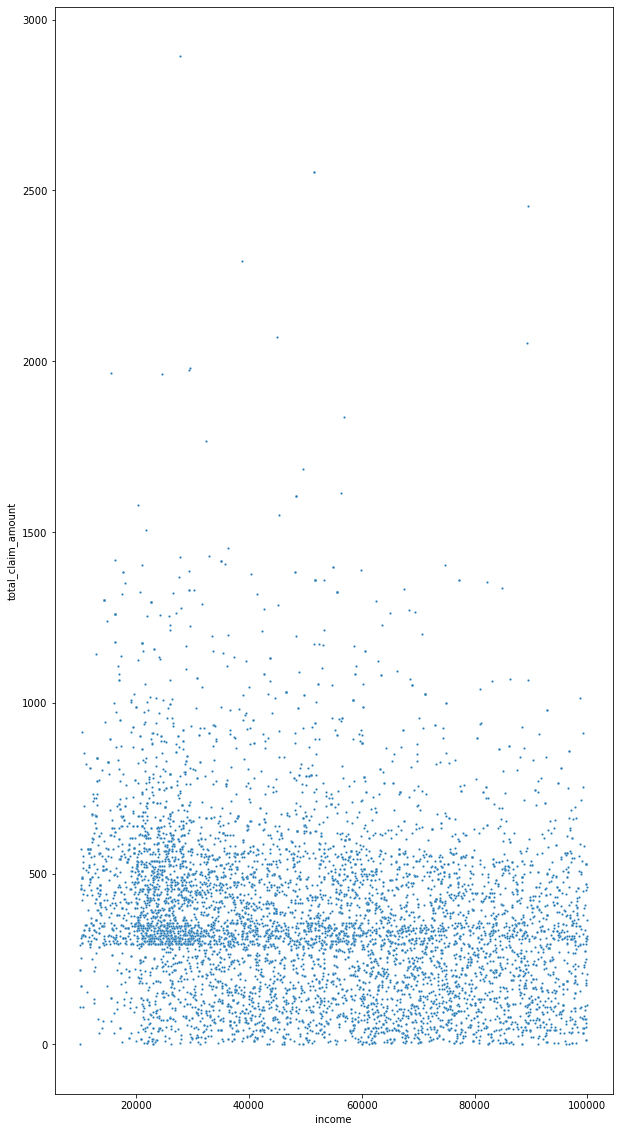

In [34]:
# Create scatterplot of income and total claim amount, adjust figure- and marker size to avoid overplotting
plt.figure(figsize=(10,20))
sns.scatterplot(x='income', y='total_claim_amount', data=df, s=5, alpha=1) # 's' adjusts marker size

# Customer Analysis Round 4

## Identify categorical and numerical columns


In [35]:
# Isolate numerical values
df_numerical= df.select_dtypes(np.number)
df_numerical


customer_lifetime_value  income  monthly_premium_auto  \
0                  4809.216960   48029                    61   
2                 14947.917300   22139                   100   
3                 22332.439460   49078                    97   
4                  9025.067525   23675                   117   
5                  4745.181764   50549                    61   
...                        ...     ...                   ...   
10902              3579.023825   28304                    91   
10903              2771.663013   59855                    74   
10906              5259.444853   61146                    65   
10907             23893.304100   39837                   201   
10908             11971.977650   64195                   158   

       months_since_last_claim  months_since_policy_inception  \
0                     7.000000                             52   
2                    34.000000                             31   
3                    10.000000                              3   
4                    15.149071                             31   
5                     2.000000                             73   
...                        ...                            ...   
10902                10.000000                             30   
10903                30.000000                             82   
10906                 7.000000                             68   
10907                11.000000                             63   
10908                 0.000000                             27   

       number_of_open_complaints  number_of_policies  total_claim_amount  \
0                       0.000000                   9          292.800000   
2                       0.000000                   2          480.000000   
3                       0.000000                   2          484.013411   
4                       0.384256                   7          707.925645   
5                       0.000000                   7          292.800000   
...                          ...                 ...                 ...   
10902                   2.000000                   1          655.200000   
10903                   4.000000                   1          355.200000   
10906                   0.000000                   6          273.018929   
10907                   0.000000                   2          381.306996   
10908                   4.000000                   6          618.288849   

       month  
0          2  
2          2  
3          1  
4          1  
5          2  
...      ...  
10902      1  
10903      1  
10906      1  
10907      2  
10908      2  

[8123 rows x 9 columns]

In [36]:
# Categorical values
df_categorical= df.select_dtypes(include='object')

## Construct distribution plots

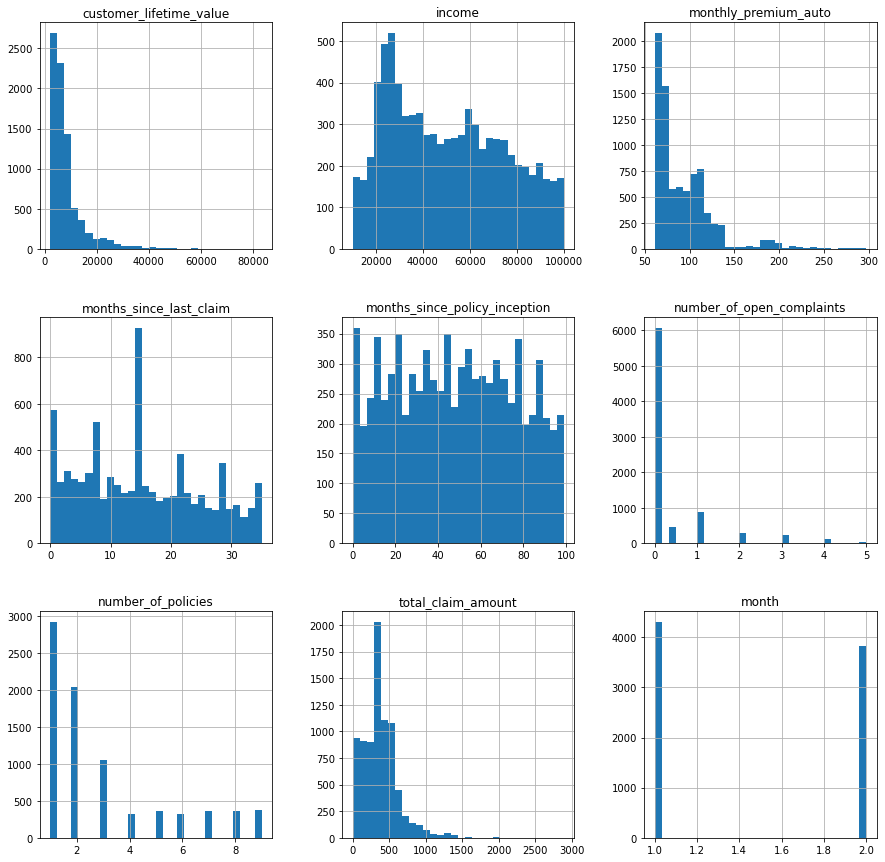

In [37]:
df_numerical.hist(bins=30, figsize=(15, 15));

## Construct distribution plots using seaborn

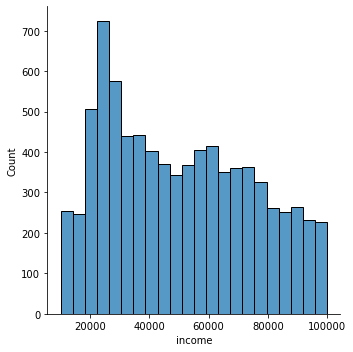

In [38]:
sns.displot(data=df_numerical, x='income')

In [39]:
#sns.pairplot(df)

In [66]:
df_numerical['response']=df['response']

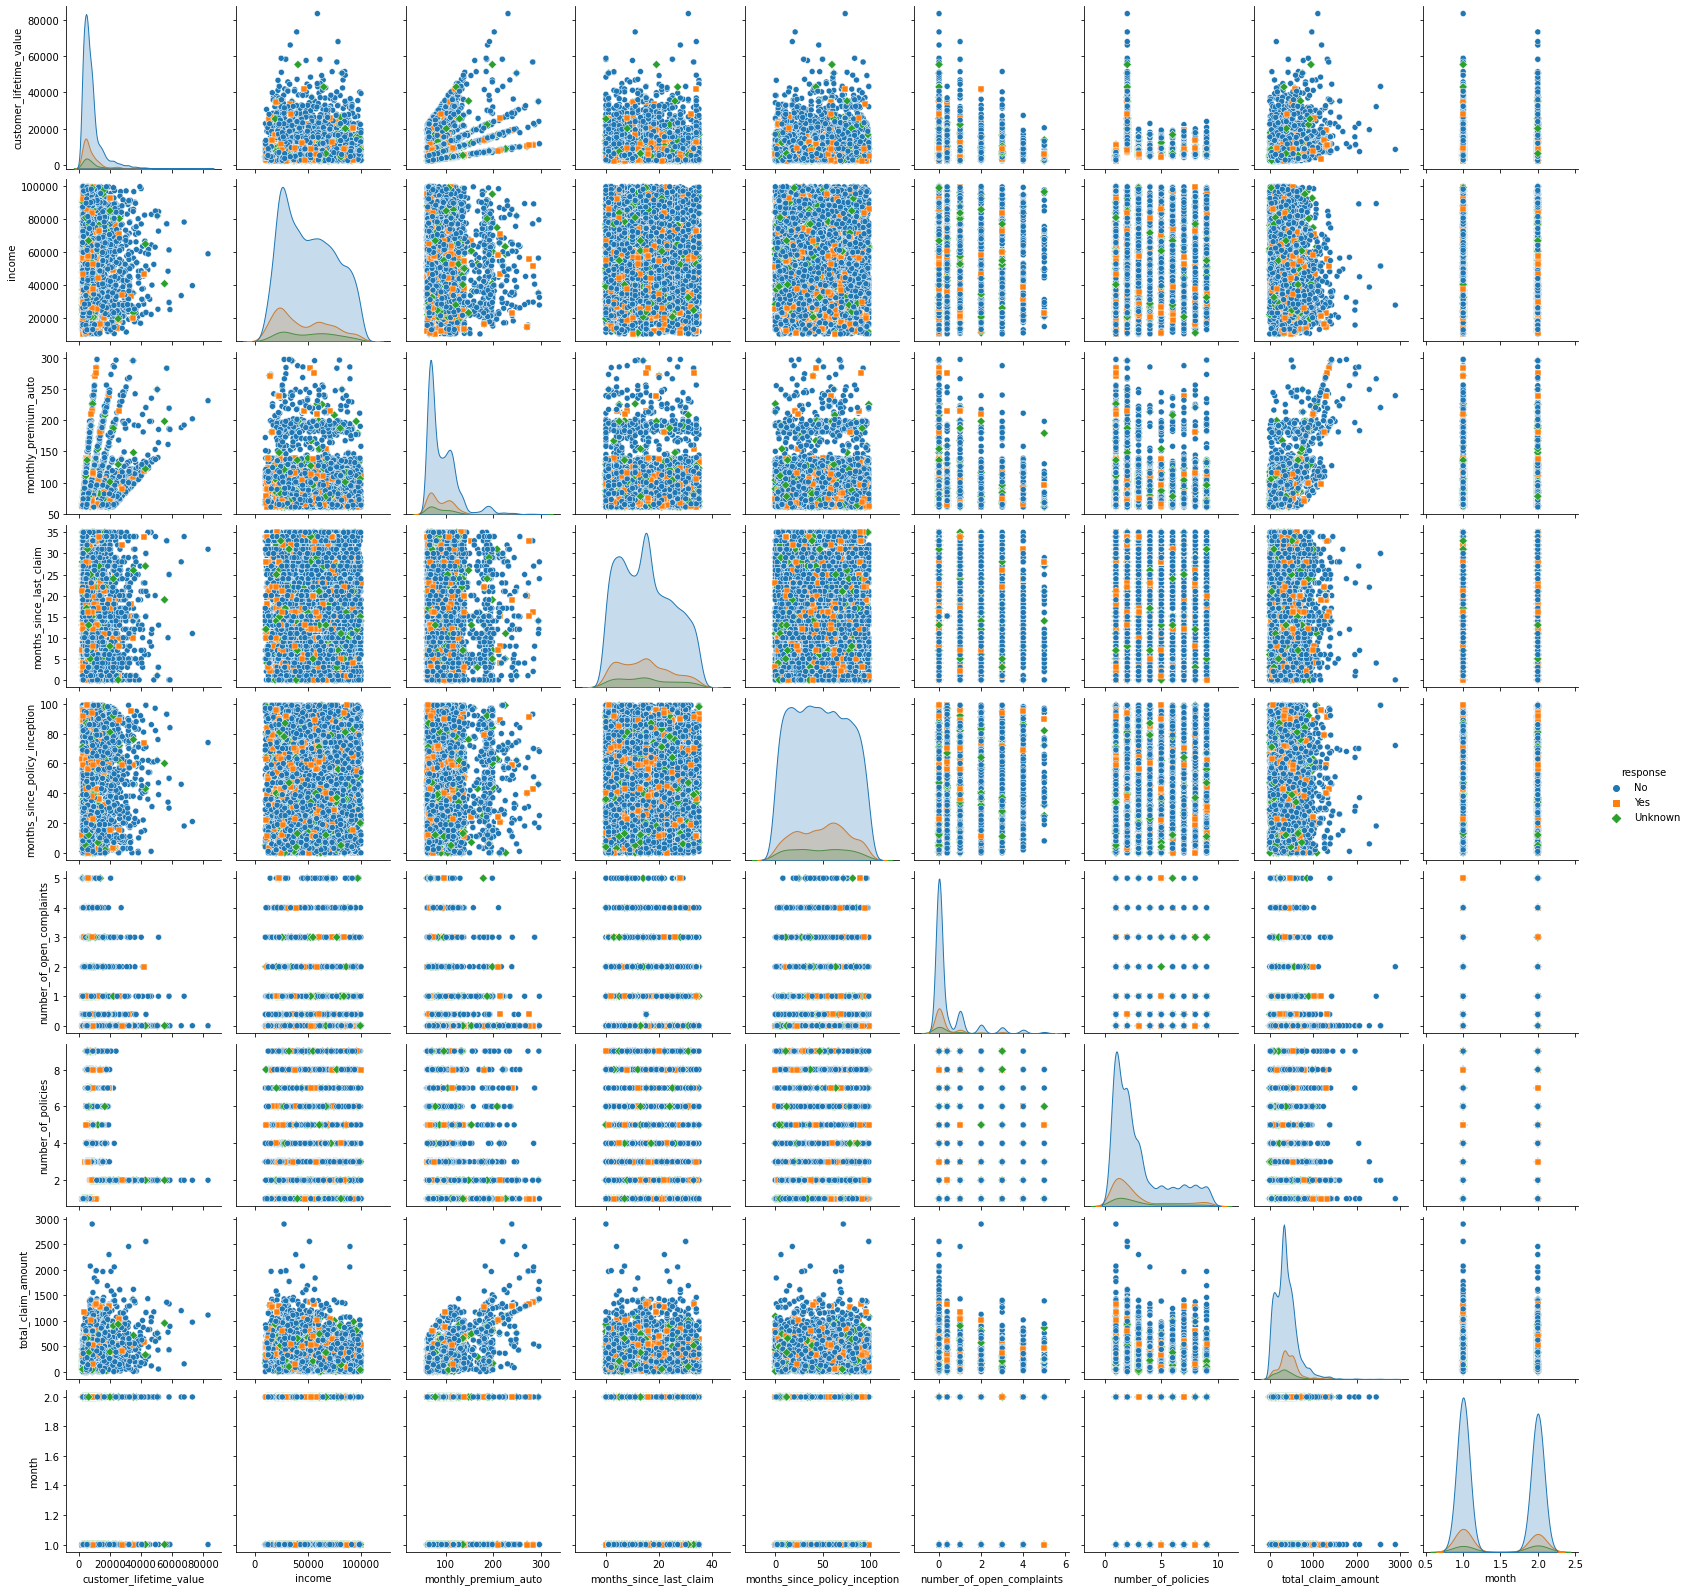

In [67]:
sns.pairplot(df, hue='response', markers=["o", "s", "D"])

## Normal distribution
The values appear to not be normally distributed

## Check the multicollinearity between the features

In [63]:
correlations_matrix = df_numerical.corr()
correlations_matrix

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.028306   
income                                        0.028306  1.000000   
monthly_premium_auto                          0.403069 -0.009788   
months_since_last_claim                       0.016052 -0.023814   
months_since_policy_inception                 0.016960 -0.005903   
number_of_open_complaints                    -0.032243  0.007163   
number_of_policies                            0.016024 -0.009960   
total_claim_amount                            0.232626 -0.354141   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.403069                 0.016052   
income                                    -0.009788                -0.023814   
monthly_premium_auto                       1.000000                 0.008744   
months_since_last_claim                    0.008744                 1.000000   
months_since_policy_inception              0.018953                -0.039318   
number_of_open_complaints                 -0.010350                 0.002246   
number_of_policies                        -0.020505                 0.007678   
total_claim_amount                         0.631799                 0.013137   

                               months_since_policy_inception  \
customer_lifetime_value                             0.016960   
income                                             -0.005903   
monthly_premium_auto                                0.018953   
months_since_last_claim                            -0.039318   
months_since_policy_inception                       1.000000   
number_of_open_complaints                           0.004376   
number_of_policies                                 -0.009123   
total_claim_amount                                  0.003095   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                        -0.032243            0.016024   
income                                          0.007163           -0.009960   
monthly_premium_auto                           -0.010350           -0.020505   
months_since_last_claim                         0.002246            0.007678   
months_since_policy_inception                   0.004376           -0.009123   
number_of_open_complaints                       1.000000            0.004098   
number_of_policies                              0.004098            1.000000   
total_claim_amount                             -0.011379           -0.008923   

                               total_claim_amount  
customer_lifetime_value                  0.232626  
income                                  -0.354141  
monthly_premium_auto                     0.631799  
months_since_last_claim                  0.013137  
months_since_policy_inception            0.003095  
number_of_open_complaints               -0.011379  
number_of_policies                      -0.008923  
total_claim_amount                       1.000000

['Customer_Lifetime_Value', 'Income', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_Of_Open_Complaints', 'Number_Of_Policies', 'Total_Claim_Amount']


<AxesSubplot:>

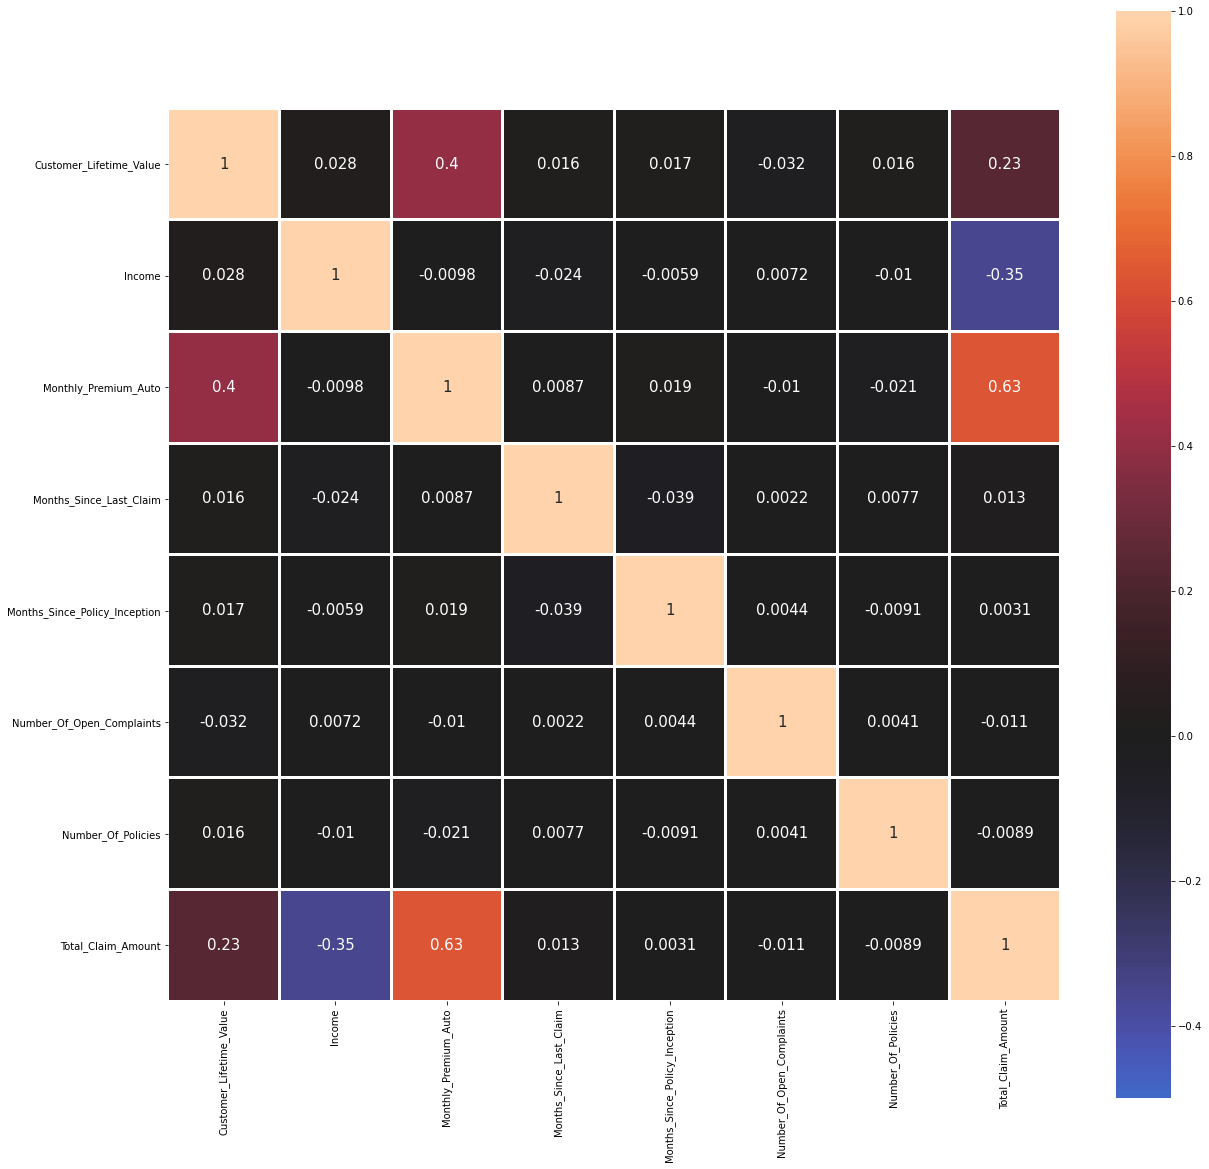

In [68]:
plt.figure(figsize=(20,20))
lst = [column.title() for column in correlations_matrix.columns]
print(lst)
sns.heatmap(correlations_matrix, annot=True, annot_kws={"size": 15}, 
            cbar=True, 
            square=True, 
            xticklabels=lst, yticklabels=lst, 
            vmin=-0.5, vmax=1, center=0, 
            linewidths=2)

# Linear regression - predict "total claim amount"

In [69]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [70]:
df.shape

(8123, 25)

In [71]:
df.columns.to_list()

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employment_status',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size',
 'month']

In [72]:
y= df['total_claim_amount'] # Dependent Variable

# drop dependent variable and irrelevant columns
X= df.drop(['month', 'customer', 'total_claim_amount'], axis=1) # Independent Variable

In [73]:
# Divide into categorical and numerical
X_num = X.select_dtypes(include = np.number)

X_num.head()


customer_lifetime_value  income  monthly_premium_auto  \
0              4809.216960   48029                    61   
1             14947.917300   22139                   100   
2             22332.439460   49078                    97   
3              9025.067525   23675                   117   
4              4745.181764   50549                    61   

   months_since_last_claim  months_since_policy_inception  \
0                 7.000000                             52   
1                34.000000                             31   
2                10.000000                              3   
3                15.149071                             31   
4                 2.000000                             73   

   number_of_open_complaints  number_of_policies  
0                   0.000000                   9  
1                   0.000000                   2  
2                   0.000000                   2  
3                   0.384256                   7  
4                   0.000000                   7

In [74]:
X_cat = X.select_dtypes(include = object)
X_cat

state response  coverage             education employment_status  \
0        Arizona       No     Basic               College          Employed   
1     Washington       No     Basic              Bachelor          Employed   
2         Oregon      Yes  Extended               College          Employed   
3         Oregon       No   Premium              Bachelor     Medical Leave   
4        Unknown  Unknown     Basic  High School or Below          Employed   
...          ...      ...       ...                   ...               ...   
8118  California       No  Extended  High School or Below          Employed   
8119     Arizona       No     Basic               College          Employed   
8120      Oregon       No     Basic               College          Employed   
8121     Arizona       No  Extended              Bachelor          Employed   
8122  California       No   Premium               College          Employed   

     gender location_code marital_status     policy_type        policy  \
0         M      Suburban        Married  Corporate Auto  Corporate L3   
1         M      Suburban         Single   Personal Auto   Personal L3   
2         M      Suburban         Single  Corporate Auto  Corporate L3   
3         F      Suburban        Married   Personal Auto   Personal L2   
4         M      Suburban       Divorced   Personal Auto   Personal L3   
...     ...           ...            ...             ...           ...   
8118      F      Suburban        Married   Personal Auto   Personal L2   
8119      M      Suburban        Married   Personal Auto   Personal L2   
8120      F         Urban        Married   Personal Auto   Personal L3   
8121      F         Rural        Married  Corporate Auto  Corporate L3   
8122      F         Urban       Divorced   Personal Auto   Personal L1   

     renew_offer_type sales_channel  vehicle_class vehicle_size  
0              Offer3         Agent  Four-Door Car      Medsize  
1              Offer3   Call Center            SUV      Medsize  
2              Offer2        Branch  Four-Door Car      Medsize  
3              Offer1        Branch  Four-Door Car      Medsize  
4              Offer1         Agent  Four-Door Car      Medsize  
...               ...           ...            ...          ...  
8118           Offer2         Agent  Four-Door Car      Medsize  
8119           Offer2        Branch   Two-Door Car      Medsize  
8120           Offer2        Branch  Four-Door Car      Medsize  
8121           Offer1           Web     Luxury SUV      Medsize  
8122           Offer1        Branch            SUV      Medsize  

[8123 rows x 14 columns]

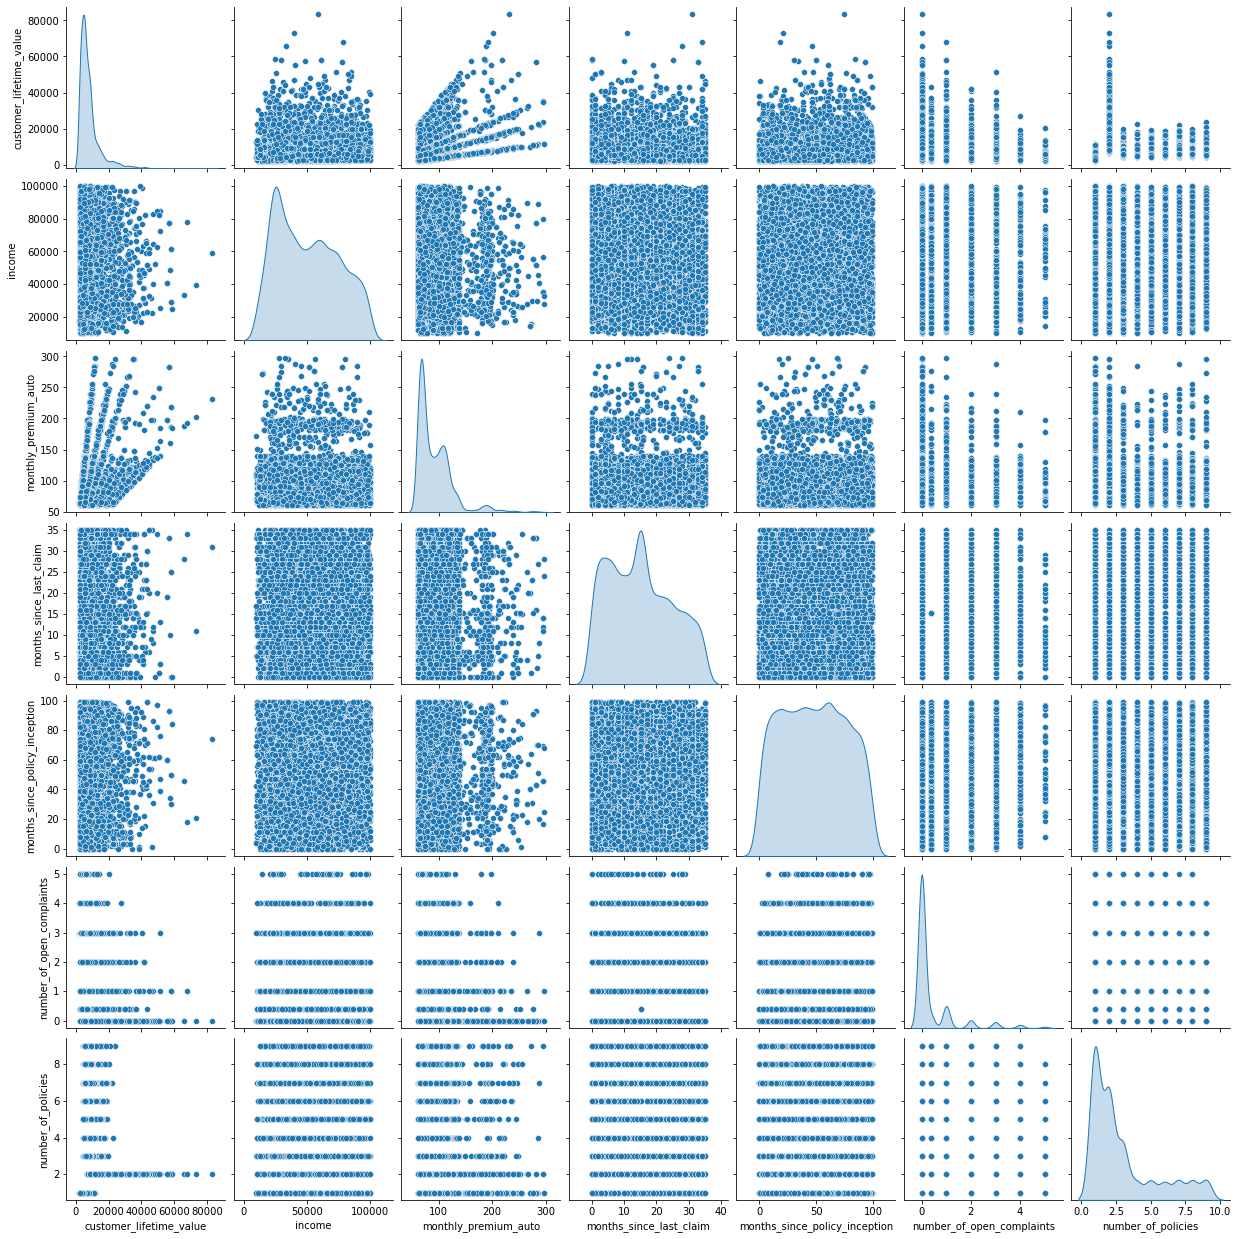

In [75]:
# After making changes, replot to see impact
sns.pairplot(X_num, diag_kind='kde')

In [76]:
# option 1 standardising all numeric features / rescaling using Normalizer 
from sklearn.preprocessing import Normalizer

transformer =  Normalizer().fit(X_num)
X_normalized = transformer.transform (X_num)
X_normalized

array([[9.96331517e-02, 9.95022825e-01, 1.26374466e-03, ...,
        1.07729053e-03, 0.00000000e+00, 1.86454130e-04],
       [5.59573342e-01, 8.28770589e-01, 3.74348701e-03, ...,
        1.16048097e-03, 0.00000000e+00, 7.48697402e-05],
       [4.14175077e-01, 9.10195435e-01, 1.79895182e-03, ...,
        5.56376850e-05, 0.00000000e+00, 3.70917900e-05],
       ...,
       [8.56980004e-02, 9.96319969e-01, 1.05911749e-03, ...,
        1.10799983e-03, 0.00000000e+00, 9.77646913e-05],
       [5.14349634e-01, 8.57568560e-01, 4.32691419e-03, ...,
        1.35619698e-03, 0.00000000e+00, 4.30538725e-05],
       [1.83332463e-01, 9.83047898e-01, 2.41952750e-03, ...,
        4.13463560e-04, 6.12538608e-05, 9.18807912e-05]])

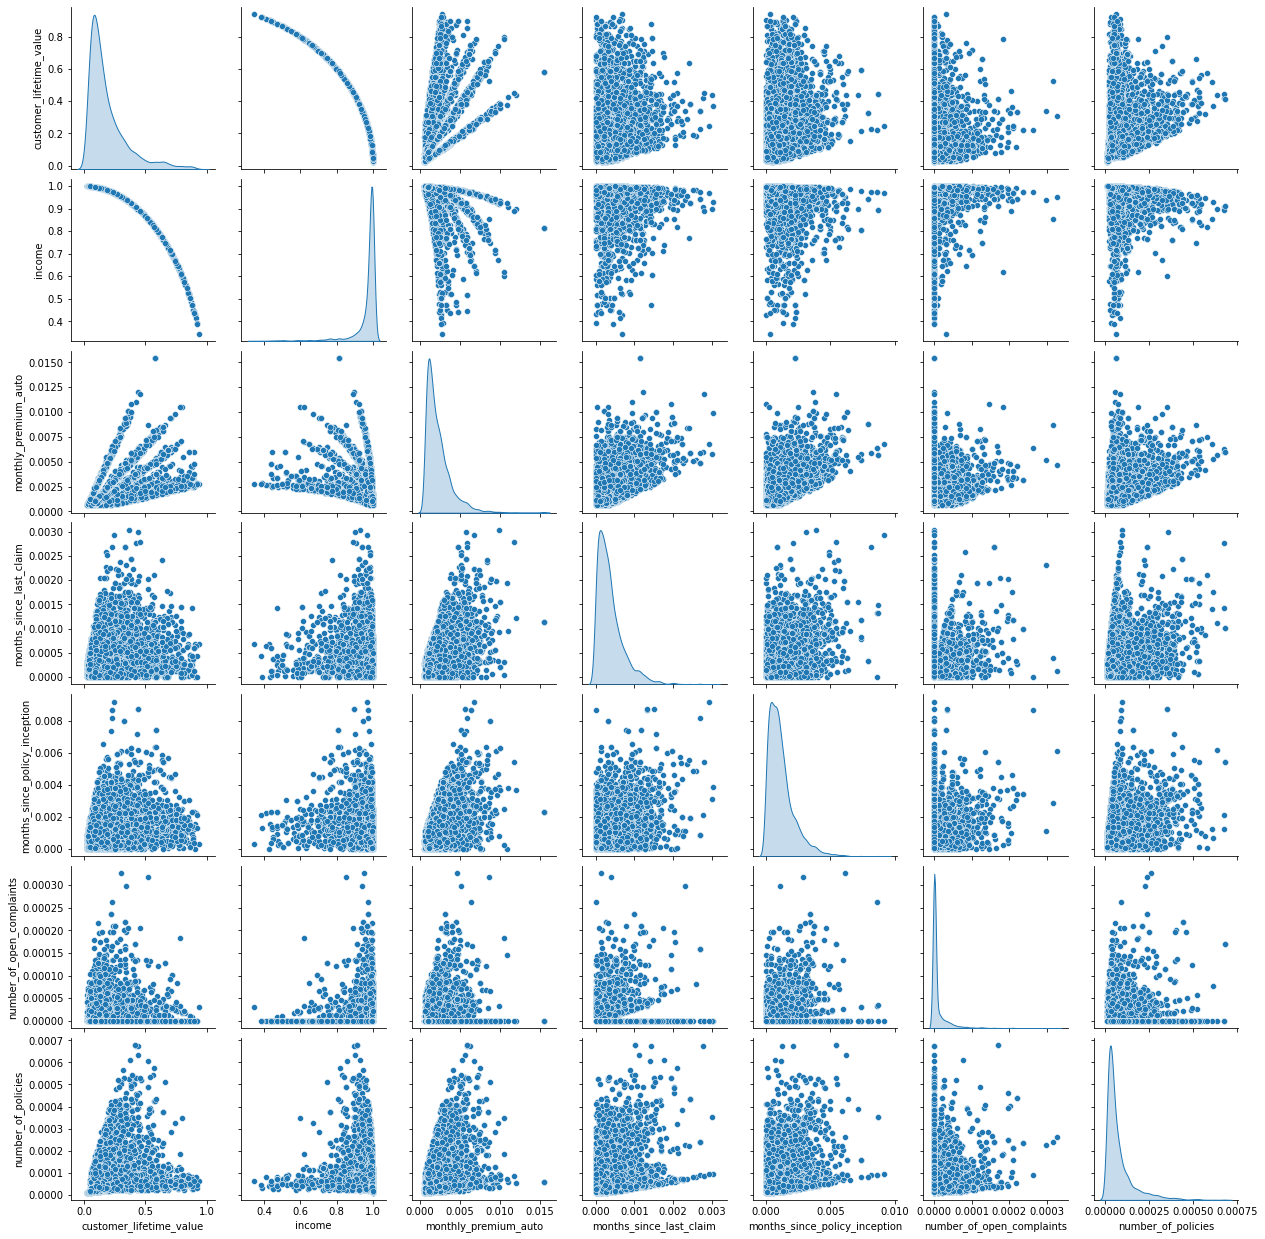

In [77]:
numb_columns = X_num.columns.to_list()
X_norm = pd.DataFrame(X_normalized, columns=numb_columns)
sns.pairplot(X_norm, diag_kind='kde')

In [93]:
# Rescale date values
from sklearn.preprocessing import MinMaxScaler

# Run MinMax- this ensures a distribution where the smallest number is 
transformer = MinMaxScaler().fit(df[['effective_to_date']])
X_minmax =transformer.transform(df[['effective_to_date']])
X_minmax

array([[0.82758621],
       [0.68965517],
       [0.17241379],
       ...,
       [0.0862069 ],
       [0.62068966],
       [0.74137931]])

array([[<AxesSubplot:xlabel='effective_to_date', ylabel='effective_to_date'>]],
      dtype=object)

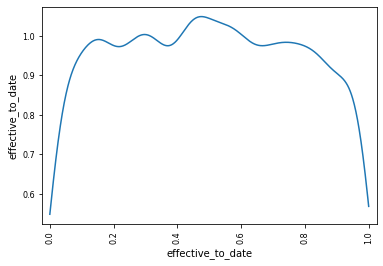

In [105]:
from pandas.plotting import scatter_matrix
df_date = pd.DataFrame(X_minmax, columns=['effective_to_date'])
scatter_matrix(df_date, diagonal= 'kde')

In [79]:
X_num

customer_lifetime_value  income  monthly_premium_auto  \
0                 4809.216960   48029                    61   
1                14947.917300   22139                   100   
2                22332.439460   49078                    97   
3                 9025.067525   23675                   117   
4                 4745.181764   50549                    61   
...                       ...     ...                   ...   
8118              3579.023825   28304                    91   
8119              2771.663013   59855                    74   
8120              5259.444853   61146                    65   
8121             23893.304100   39837                   201   
8122             11971.977650   64195                   158   

      months_since_last_claim  months_since_policy_inception  \
0                    7.000000                             52   
1                   34.000000                             31   
2                   10.000000                              3   
3                   15.149071                             31   
4                    2.000000                             73   
...                       ...                            ...   
8118                10.000000                             30   
8119                30.000000                             82   
8120                 7.000000                             68   
8121                11.000000                             63   
8122                 0.000000                             27   

      number_of_open_complaints  number_of_policies  
0                      0.000000                   9  
1                      0.000000                   2  
2                      0.000000                   2  
3                      0.384256                   7  
4                      0.000000                   7  
...                         ...                 ...  
8118                   2.000000                   1  
8119                   4.000000                   1  
8120                   0.000000                   6  
8121                   0.000000                   2  
8122                   4.000000                   6  

[8123 rows x 7 columns]

In [80]:
# Rescale numerical values using standardisation method
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_num)
X_standardised =transformer.transform(X_num)
X_standardised

array([[-0.47819967, -0.09835287, -0.92360995, ...,  0.14851539,
        -0.43430553,  2.51218228],
       [ 0.97028155, -1.1655696 ,  0.20216528, ..., -0.60415702,
        -0.43430553, -0.40046981],
       [ 2.02528282, -0.05511183,  0.11556718, ..., -1.60772022,
        -0.43430553, -0.40046981],
       ...,
       [-0.41387716,  0.44234554, -0.80814583, ...,  0.72198008,
        -0.43430553,  1.26390281],
       [ 2.24827818, -0.4360369 ,  3.11763446, ...,  0.54277236,
        -0.43430553, -0.40046981],
       [ 0.54511929,  0.56802897,  1.8763951 , ..., -0.74752319,
         4.1037162 ,  1.26390281]])

array([[<AxesSubplot:xlabel='customer_lifetime_value', ylabel='customer_lifetime_value'>,
        <AxesSubplot:xlabel='income', ylabel='customer_lifetime_value'>,
        <AxesSubplot:xlabel='monthly_premium_auto', ylabel='customer_lifetime_value'>,
        <AxesSubplot:xlabel='months_since_last_claim', ylabel='customer_lifetime_value'>,
        <AxesSubplot:xlabel='months_since_policy_inception', ylabel='customer_lifetime_value'>,
        <AxesSubplot:xlabel='number_of_open_complaints', ylabel='customer_lifetime_value'>,
        <AxesSubplot:xlabel='number_of_policies', ylabel='customer_lifetime_value'>],
       [<AxesSubplot:xlabel='customer_lifetime_value', ylabel='income'>,
        <AxesSubplot:xlabel='income', ylabel='income'>,
        <AxesSubplot:xlabel='monthly_premium_auto', ylabel='income'>,
        <AxesSubplot:xlabel='months_since_last_claim', ylabel='income'>,
        <AxesSubplot:xlabel='months_since_policy_inception', ylabel='income'>,
        <AxesSubplot:xlabel='number

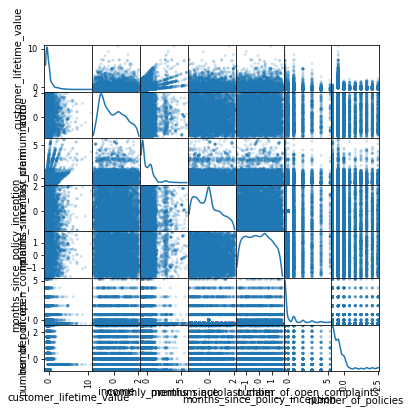

In [81]:
X_std = pd.DataFrame(X_standardised, columns=numb_columns)
scatter_matrix(X_std, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [82]:
# Turn categories into numbers using OHE - this converts the values into binary, i.e. a new column is created for each unique value in the category and a value of True (1) or False (0) is assigned.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [112]:
X_num= X_standardised
print(X_num.shape)
X_cat= encoded
print(X_cat.shape)
print(X_minmax.shape)

# Combine numerical and categorical
X = np.concatenate((X_num, X_cat, X_minmax), axis=1)
print(X.shape)

(8123, 7)
(8123, 46)
(8123, 1)
(8123, 54)


In [84]:
# Split the data into train and test, randomly, as a %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=100)

In [87]:
lm= linear_model.LinearRegression() # configure model
model= lm.fit(X_train, y_train) # train model
predictions = lm.predict(X_test) # set up prediction method
r2_score(y_test, predictions) # calculate my accuracy

0.79947975043631

R2 Score = 0.799. This indicates that the model is almost 80% effective at predicting the Total Claim Amount. One could attempt to improve the model by removing outliers and/or gathering more data. Finding out more information about the sampling method could also be helpful.